# Movie Recommendation System (WIP)

## #1

In [119]:
from numpy import dot
import math
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [64]:
ls data

credits.csv          links_small.csv      ratings_small.csv
keywords.csv         movies_metadata.csv
links.csv            ratings.csv


In [71]:
credits = pd.read_csv('data/credits.csv')
keywords = pd.read_csv('data/keywords.csv')
ratings = pd.read_csv('data/ratings_small.csv')
links = pd.read_csv('data/links_small.csv')

In [85]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [103]:
ratings[ratings.userId==2]

,userId,movieId,rating,timestamp
20,2,10,4.0,835355493
21,2,17,5.0,835355681
22,2,39,5.0,835355604
23,2,47,4.0,835355552
24,2,50,4.0,835355586
...,...,...,...,...
91,2,592,5.0,835355395
92,2,593,3.0,835355511
93,2,616,3.0,835355932
94,2,661,4.0,835356141


In [98]:
users = pd.pivot_table(ratings, index='userId', columns='movieId', values='rating')

In [129]:
users

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
users.fillna(0, inplace=True)

In [126]:
users.to_numpy().shape

(671, 9066)

In [118]:
similar_users = cosine_similarity(users.to_numpy())

In [134]:
tsne = TSNE().fit_transform(similar_users)

In [140]:
from sklearn.cluster import KMeans

In [178]:
kmeans = KMeans(n_clusters=4).fit(tsne, range(len(tsne)))

In [181]:
classes = kmeans.predict(tsne)

In [203]:
users.loc[2][users.loc[2] > 0]

movieId
10     4.0
17     5.0
39     5.0
47     4.0
50     4.0
      ... 
592    5.0
593    3.0
616    3.0
661    4.0
720    4.0
Name: 2, Length: 76, dtype: float64

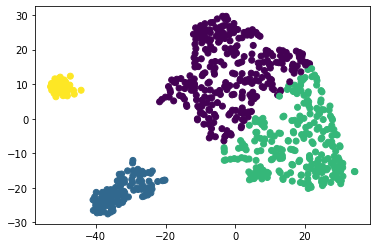

In [179]:
plt.scatter(tsne[:,0],tsne[:,1], c=kmeans.predict(tsne))

In [2]:
metadata = pd.read_csv('data/movies_metadata.csv', low_memory=False)

In [5]:
tfidf = TfidfVectorizer(stop_words='english')
metadata['overview'] = metadata['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(metadata['overview'])

In [81]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [135]:
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

In [136]:
indices

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Subdue                         45461
Century of Birthing            45462
Betrayal                       45463
Satan Triumphant               45464
Queerama                       45465
Length: 45466, dtype: int64

In [137]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    return metadata['title'].iloc[movie_indices]

In [140]:
get_recommendations('Finding Nemo')

38176                            Finding Dory
23948    Captain Nemo and the Underwater City
16168                                The Reef
15530                              Mr. Nobody
25938                   The Reef 2: High Tide
990              20,000 Leagues Under the Sea
24109            20,000 Leagues Under the Sea
41556                             Uninhabited
41657                        Under the Sea 3D
40283                             The Mermaid
Name: title, dtype: object

## #2

In [81]:
# Load keywords and credits
credits = pd.read_csv('data/credits.csv')
keywords = pd.read_csv('data/keywords.csv')

# Remove rows with bad IDs.
metadata = metadata.drop([19730, 29503, 35587])

# Convert IDs to int. Required for merging
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
metadata['id'] = metadata['id'].astype('int')

# Merge keywords and credits into your main metadata dataframe
metadata = metadata.merge(credits, on='id')
metadata = metadata.merge(keywords, on='id')

In [82]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    metadata[feature] = metadata[feature].apply(literal_eval)

In [83]:
import numpy as np

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan


def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []



metadata['director'] = metadata['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    metadata[feature] = metadata[feature].apply(get_list)

In [84]:
metadata[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy]","[Animation, Comedy, Family]"
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[fishing, best friend, duringcreditsstinger]","[Romance, Comedy]"


In [85]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [86]:
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    metadata[feature] = metadata[feature].apply(clean_data)

In [87]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [88]:
metadata['soup'] = metadata.apply(create_soup, axis=1)

In [90]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(metadata['soup'])

In [91]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [92]:
metadata = metadata.reset_index()
indices = pd.Series(metadata.index, index=metadata['title'])

In [101]:
get_recommendations('The Matrix', cosine_sim2)

[6290, 6852, 6457, 45332, 7993, 730, 1216, 9453, 13844, 26066]


6290                    The Matrix Reloaded
6852                 The Matrix Revolutions
6457     Terminator 3: Rise of the Machines
45332                           Kid's Story
7993                               I, Robot
730                      Ghost in the Shell
1216                         The Terminator
9453                          The Animatrix
13844                  Terminator Salvation
26066                    Terminator Genisys
Name: title, dtype: object